<div align='center'>
    <h1>Tugas Besar Dasar Kecerdasan Artifisial System Fuzzy</h1>
    <h2>Storm Prediction Warning</h2>
    <h4>103012300100 Veiron Vaya Yarief</h3>
    <h4>103012300288 Muhammad Ihsan Naufal</h3>
</div>

In [1]:
import pandas as pd
import sympy as sp
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 
from skfuzzy import control as ctrl
from IPython.display import display

In [2]:
data = pd.read_csv("processed_weather.csv",sep = ';',low_memory=False)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,17.8,29.7,No,No


In [4]:
cols_to_convert = [
    'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',
    'Humidity9am', 'Humidity3pm',
    'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed',
    'Pressure9am', 'Pressure3pm'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col],errors = 'coerce')

In [5]:
data['temp_day_avg'] = data[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean(axis=1)
data['humidity_avg'] = data[['Humidity9am', 'Humidity3pm']].mean(axis=1)
data['wind_speed_avg'] = data[['WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']].mean(axis=1)
data['pressure_avg'] = data[['Pressure9am', 'Pressure3pm']].mean(axis=1)

In [6]:
processed_data = data[['temp_day_avg', 'humidity_avg', 'wind_speed_avg', 'pressure_avg']]

processed_data.head()

,temp_day_avg,humidity_avg,wind_speed_avg,pressure_avg
0,18.750,46.5,29.333333,1007.40
1,18.500,34.5,23.333333,1009.20
2,20.700,34.0,30.333333,1008.15
3,20.450,30.5,14.666667,1015.20
4,24.325,57.5,22.666667,1008.40


In [7]:
# Data Slice
subProcData = processed_data.iloc[:500].copy()

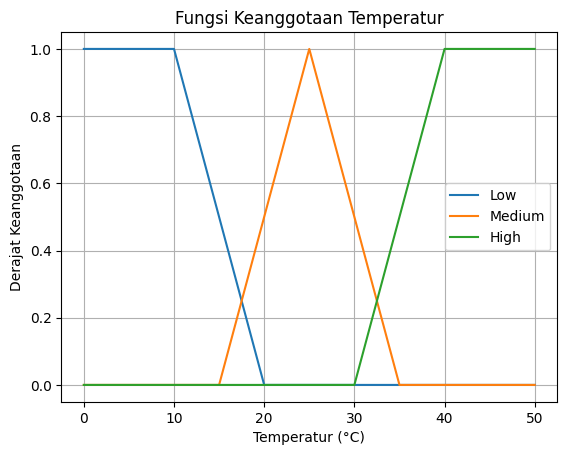

In [8]:
# Fuzzy Variables
temp = ctrl.Antecedent(np.arange(0, 51, 1), 'Temp')
temp['Low']    = fuzz.trapmf(temp.universe,  [0,  0,  10,  20])
temp['Medium'] = fuzz.trimf(temp.universe,   [15, 25, 35])
temp['High']   = fuzz.trapmf(temp.universe,  [30, 40, 50, 50])

# Plotting
plt.plot(temp.universe, temp['Low'].mf, label='Low')
plt.plot(temp.universe, temp['Medium'].mf, label='Medium')
plt.plot(temp.universe, temp['High'].mf, label='High')
plt.title('Fungsi Keanggotaan Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

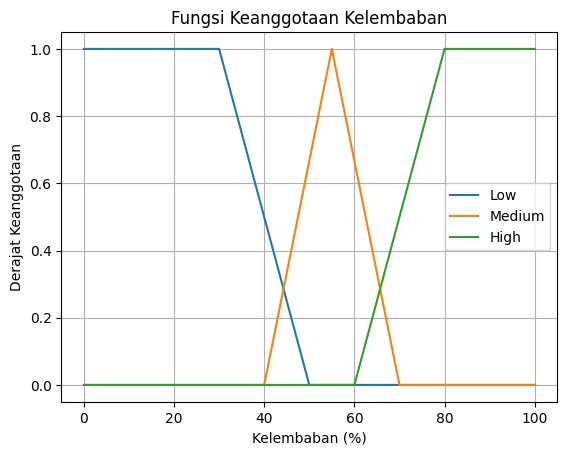

In [9]:
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
humidity['Low']    = fuzz.trapmf(humidity.universe,  [0,   0,   30,  50])
humidity['Medium'] = fuzz.trimf(humidity.universe,   [40,  55,  70])
humidity['High']   = fuzz.trapmf(humidity.universe,  [60,  80,  100, 100])

plt.plot(humidity.universe, humidity['Low'].mf, label='Low')
plt.plot(humidity.universe, humidity['Medium'].mf, label='Medium')
plt.plot(humidity.universe, humidity['High'].mf, label='High')
plt.title('Fungsi Keanggotaan Kelembaban')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

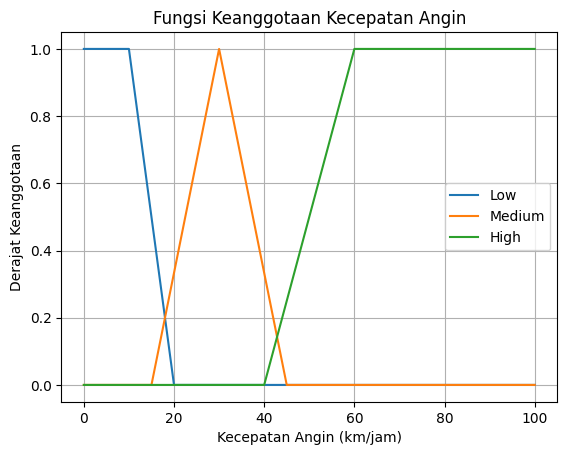

In [10]:
wind = ctrl.Antecedent(np.arange(0, 101, 1), 'WindSpeed')
wind['Low']    = fuzz.trapmf(wind.universe,  [0,   0,   10,  20])
wind['Medium'] = fuzz.trimf(wind.universe,   [15,  30,  45])
wind['High']   = fuzz.trapmf(wind.universe,  [40,  60,  100, 100])

plt.plot(wind.universe, wind['Low'].mf, label='Low')
plt.plot(wind.universe, wind['Medium'].mf, label='Medium')
plt.plot(wind.universe, wind['High'].mf, label='High')
plt.title('Fungsi Keanggotaan Kecepatan Angin')
plt.xlabel('Kecepatan Angin (km/jam)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

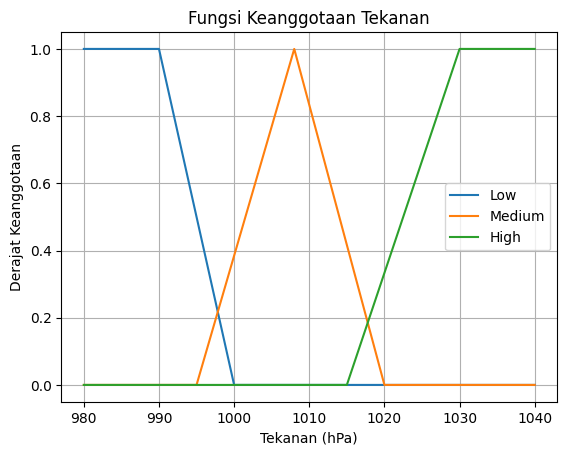

In [11]:
pressure = ctrl.Antecedent(np.arange(980, 1041, 1), 'Pressure')
pressure['Low']    = fuzz.trapmf(pressure.universe,  [980,  980,  990, 1000])
pressure['Medium'] = fuzz.trimf(pressure.universe,   [995, 1008, 1020])
pressure['High']   = fuzz.trapmf(pressure.universe,  [1015, 1030, 1040, 1040])

plt.plot(pressure.universe, pressure['Low'].mf, label='Low')
plt.plot(pressure.universe, pressure['Medium'].mf, label='Medium')
plt.plot(pressure.universe, pressure['High'].mf, label='High')
plt.title('Fungsi Keanggotaan Tekanan')
plt.xlabel('Tekanan (hPa)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

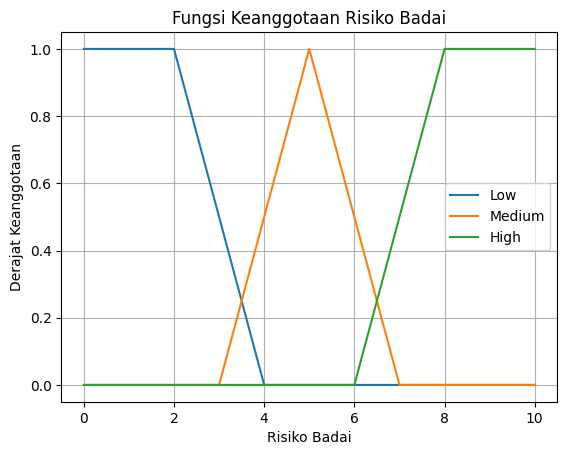

In [12]:
storm_risk = ctrl.Consequent(np.arange(0, 11, 1), 'StormRisk')
storm_risk['Low']    = fuzz.trapmf(storm_risk.universe,  [0,   0,   2,   4])
storm_risk['Medium'] = fuzz.trimf(storm_risk.universe,   [3,   5,   7])
storm_risk['High']   = fuzz.trapmf(storm_risk.universe,  [6,   8,   10,  10])


plt.plot(storm_risk.universe, storm_risk['Low'].mf, label='Low')
plt.plot(storm_risk.universe, storm_risk['Medium'].mf, label='Medium')
plt.plot(storm_risk.universe, storm_risk['High'].mf, label='High')
plt.title('Fungsi Keanggotaan Risiko Badai')
plt.xlabel('Risiko Badai')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# (1) High Risk if (Pressure is Low) OR (Wind is High)
rule1 = ctrl.Rule(
    pressure['Low'] | wind['High'],
    storm_risk['High']
)

# (2) High Risk if (Humidity is High) AND (Wind is Medium OR Temp is High)
rule2 = ctrl.Rule(
    (humidity['High'] & (wind['Medium'] | temp['High'])),
    storm_risk['High']
)

# (3) Medium Risk if (Humidity, Temp, and Wind are all Medium)
rule3 = ctrl.Rule(
    (humidity['Medium'] & temp['Medium'] & wind['Medium']),
    storm_risk['Medium']
)

# (4) Low Risk if (Pressure is Medium) AND (Humidity is Low)
rule4 = ctrl.Rule(
    (pressure['Medium'] & humidity['Low']),
    storm_risk['Low']
)

# (5) Low Risk if (Wind is Low) AND (Pressure is High)
rule5 = ctrl.Rule(
    (wind['Low'] & pressure['High']),
    storm_risk['Low']
)

# (6) Default: catch‐all → Medium Risk
# Since for any numeric Temp, at least one of temp['Low'], temp['Medium'], temp['High'] is nonzero,
# this rule will always fire to some degree. 
rule6 = ctrl.Rule(
    (temp['Low'] | temp['Medium'] | temp['High']),
    storm_risk['Medium']
)

# Build the control system with all six rules:
storm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])


In [14]:
# For Row Function
def compute_storm_risk(temp_val, hum_val, wind_val, pres_val):
    # Create a fresh simulator each time
    sim = ctrl.ControlSystemSimulation(storm_ctrl)
    sim.input['Temp']      = temp_val
    sim.input['Humidity']  = hum_val
    sim.input['WindSpeed'] = wind_val
    sim.input['Pressure']  = pres_val

    
    sim.compute()
    val = sim.output['StormRisk']  # should exist if everything is defined above


    # Turn numeric 0..10 back into a category
    if val < 3:
        cat = 'Low'
    elif val < 7:
        cat = 'Medium'
    else:
        cat = 'High'
  
    return val, cat

def row_to_risk(row):
    v, c = compute_storm_risk(
        row['temp_day_avg'],
        row['humidity_avg'],
        row['wind_speed_avg'],
        row['pressure_avg']
    )
    return pd.Series({'StormRiskValue': v, 'StormRiskCategory': c})





In [15]:
#Implementation
risk_df = subProcData.apply(row_to_risk, axis=1)
subProcData[['StormRiskValue','StormRiskCategory']] = risk_df

# Format float and rename columns
pretty_df = subProcData.copy()
pretty_df['StormRiskValue'] = pretty_df['StormRiskValue'].round(3)
pretty_df = pretty_df.rename(columns={
    'temp_day_avg': 'Temp (°C)',
    'humidity_avg': 'Humidity (%)',
    'wind_speed_avg': 'Wind (km/h)',
    'pressure_avg': 'Pressure (hPa)',
    'StormRiskValue': 'Storm Risk Score',
    'StormRiskCategory': 'Risk Category'
})

print("\n🌪️ Final Storm Risk Prediction:")
display(pretty_df.head(20))


🌪️ Final Storm Risk Prediction:


,Temp (°C),Humidity (%),Wind (km/h),Pressure (hPa),Storm Risk Score,Risk Category
0,18.750,46.5,29.333333,1007.40,3.923,Medium
1,18.500,34.5,23.333333,1009.20,2.686,Low
2,20.700,34.0,30.333333,1008.15,2.943,Low
3,20.450,30.5,14.666667,1015.20,3.482,Medium
4,24.325,57.5,22.666667,1008.40,5.000,Medium
5,23.450,39.0,33.000000,1007.30,3.393,Medium
6,20.500,34.0,31.333333,1008.90,2.926,Low
7,19.050,33.5,19.333333,1011.75,2.872,Low
8,22.525,25.5,38.333333,1006.25,2.995,Low
9,22.875,42.5,18.000000,1006.35,3.682,Medium
